# **Exploratory Data Analyis - Environmental, Social, & Governance Dataset**

In [31]:
#!pip install pandas numpy matplotlib seaborn

### ***Helper Functions for Missing Data Analysis***

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['figure.dpi'] = 120
sns.set_theme(style='whitegrid', palette='muted')

def load_esg(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    df.drop(columns=['logo', 'weburl'], inplace=True, errors='ignore')
    df['last_processing_date'] = pd.to_datetime(df['last_processing_date'], errors='coerce')
    return df

df = load_esg('../data/ESG_data.csv')

def missing_summary(df: pd.DataFrame) -> pd.DataFrame:
    """Returns a sorted DataFrame of missing counts and percentages."""
    missing = df.isnull().sum()
    pct = (missing / len(df) * 100).round(2)
    return (
        pd.DataFrame({'Missing Count': missing, 'Missing %': pct})
        .sort_values('Missing %', ascending=False)
        .query('`Missing Count` > 0')
    )

def plot_missing_heatmap(df: pd.DataFrame) -> None:
    """Heatmap showing missingness pattern across rows and columns."""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax)
    ax.set_title('Missing Value Heatmap (yellow = missing)')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_8561/146703002.py:14: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_processing_date'] = pd.to_datetime(df['last_processing_date'], errors='coerce')


### ***Missing Data Analysis***

In [72]:
missing_summary(df)

,Missing Count,Missing %
industry,13,1.8


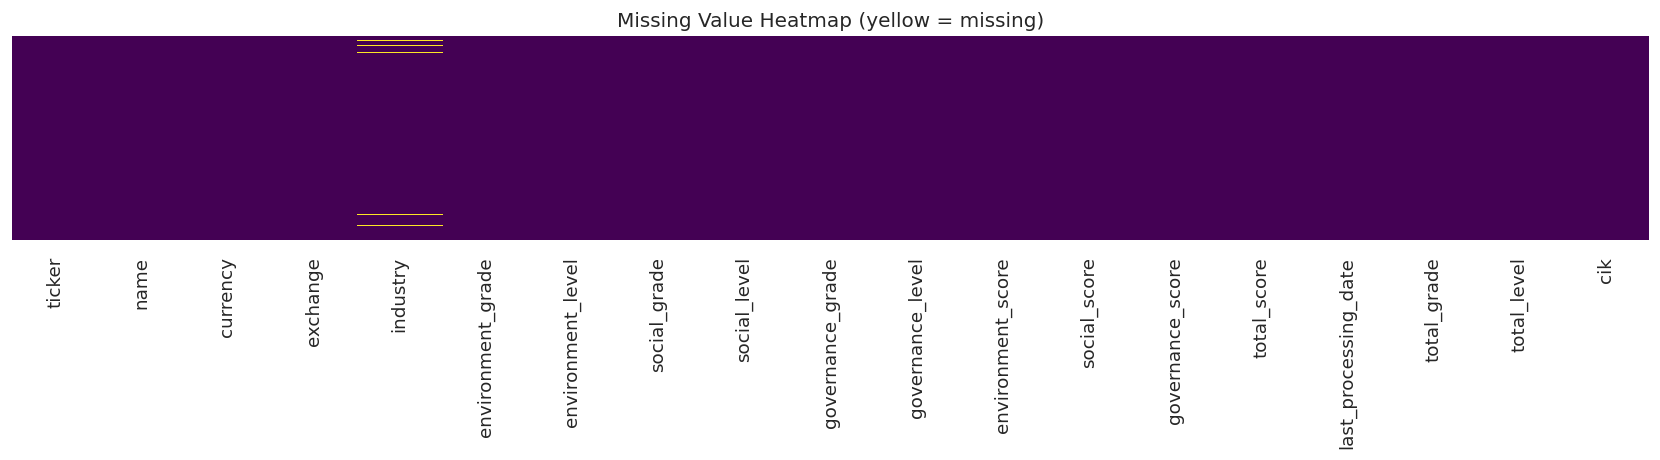

In [73]:
plot_missing_heatmap(df)

In [74]:
df[df['industry'].isna()]

,ticker,name,currency,exchange,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
15,aaci,Armada Acquisition Corp I,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,B,Medium,205,200,200,605,2022-06-20,B,Medium,1844817
27,acac,Acri Capital Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,BB,Medium,200,205,300,705,2022-06-10,B,Medium,1914023
32,acev,ACE Convergence Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,B,Medium,225,211,215,651,2022-06-10,B,Medium,1813658
57,adoc,Edoc Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,BB,Medium,BB,Medium,215,301,300,816,2022-04-16,BB,Medium,1824884
76,afaq,AF Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,B,Medium,200,200,200,600,2022-06-21,B,Medium,1841661
97,aib,AIB Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,BB,Medium,215,227,300,742,2022-05-24,B,Medium,1882963
101,akic,Sports Ventures Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,B,Medium,200,205,230,635,2022-06-11,B,Medium,1826574
123,alhc,Alignment Healthcare LLC,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,BB,Medium,B,Medium,210,302,256,768,2022-06-10,BB,Medium,1832466
630,haac,Health Assurance Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,BB,Medium,200,258,300,758,2022-06-10,BB,Medium,1824013
646,hcar,Healthcare Services Acquisition Corp,USD,NASDAQ NMS - GLOBAL MARKET,NaN,B,Medium,B,Medium,BB,Medium,245,205,300,750,2022-06-10,BB,Medium,1824846


In [76]:
df = df.dropna(subset=['industry'])

*SPACs (Special Purpose Acquisition Companies) have no real business operations, making their ESG (Environmental, Social, and Governance) scores unreliable and their industry label meaningless for any industry-based analysis or modeling.*

### ***Helper Functions for Data Distribution***

In [77]:
SCORE_COLS = ['environment_score', 'social_score', 'governance_score', 'total_score']
GRADE_COLS = ['environment_grade', 'social_grade', 'governance_grade', 'total_grade']
LEVEL_COLS = ['environment_level', 'social_level', 'governance_level', 'total_level']
COLORS     = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']

def plot_score_distributions(df: pd.DataFrame) -> None:
    """Histograms with KDE for all numeric ESG scores."""
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    for ax, col, color in zip(axes.flatten(), SCORE_COLS, COLORS):
        sns.histplot(df[col].dropna(), bins=30, kde=True, ax=ax, color=color)
        ax.axvline(df[col].mean(), color='black', linestyle='--', linewidth=1.2,
                   label=f'Mean: {df[col].mean():.1f}')
        ax.set_title(col.replace('_', ' ').title())
        ax.set_xlabel('Score')
        ax.legend()
    plt.suptitle('ESG Score Distributions', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
def plot_grade_distributions(df: pd.DataFrame) -> None:
    """Bar charts for letter grade distributions across all ESG pillars."""
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    for ax, col in zip(axes.flatten(), GRADE_COLS):
        counts = df[col].value_counts().sort_index()
        bars = ax.bar(counts.index, counts.values, color='steelblue', edgecolor='white')
        ax.set_title(col.replace('_', ' ').title())
        ax.set_xlabel('Grade')
        ax.set_ylabel('Count')
        for bar, val in zip(bars, counts.values):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                    str(val), ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.suptitle('ESG Grade Distributions', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_level_distributions(df: pd.DataFrame) -> None:
    """Horizontal bar charts for level distributions across all ESG pillars."""
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    for ax, col in zip(axes.flatten(), LEVEL_COLS):
        counts = df[col].value_counts()
        bars = ax.barh(counts.index, counts.values, color='teal', edgecolor='white')
        ax.set_title(col.replace('_', ' ').title())
        ax.set_xlabel('Count')
        for bar, val in zip(bars, counts.values):
            ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                    str(val), ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.suptitle('ESG Level Distributions', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_categorical_distributions(df: pd.DataFrame, cols: list, top_n: int = 15) -> None:
    """Horizontal bar charts for categorical columns, showing top N values by frequency."""
    fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))
    axes = np.atleast_1d(axes)
    for ax, col in zip(axes, cols):
        counts = df[col].value_counts().head(top_n)
        bars = ax.barh(counts.index, counts.values, color='slateblue', edgecolor='white')
        ax.invert_yaxis()
        ax.set_title(f'{col.title()} (Top {top_n})')
        ax.set_xlabel('Count')
        for bar, val in zip(bars, counts.values):
            ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
                    str(val), va='center', fontsize=9)
    plt.suptitle('Categorical Column Distributions', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

### ***Data Distribution Analysis***

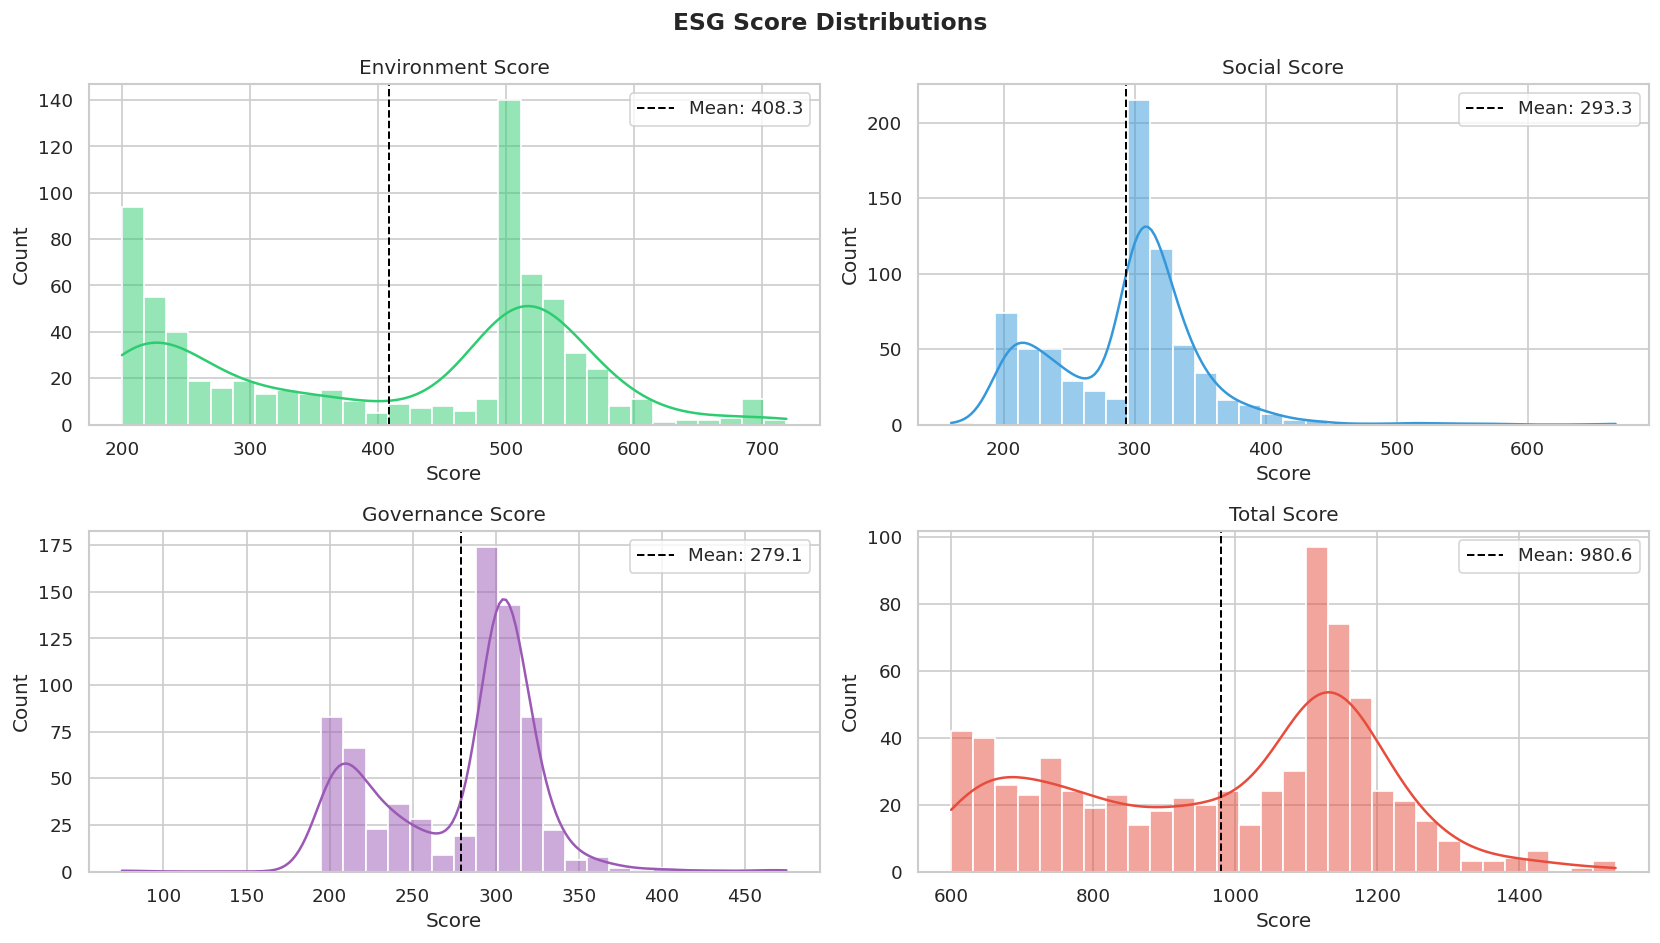

In [78]:
plot_score_distributions(df)

***~ Score Distribution ~***

**Environment Score** is bimodal with two distinct peaks around 200 to 220 and 500 to 520, suggesting two clusters of companies: low and high environmental performers with few in the middle. The mean of 404.8 falls between the two peaks and is not representative of either group.

**Social Score** is right-skewed with a sharp peak around 300, meaning most companies
score similarly on social metrics but a long tail of high scorers pulls the mean up to 292.2.

**Governance Score** is the most normally distributed of the three pillars, with a tight
cluster around 280 to 310 and a mean of 278.8, suggesting companies tend to converge on
governance practices more than environmental or social ones.

**Total Score** is also bimodal with peaks around 1050 to 1100, which reflects the
environment score's bimodality carrying through to the aggregate. The mean of 975.8
falls between the two modes.

*The bimodality in the ***environment score*** is the most notable finding and likely reflects
industry composition (e.g., heavy industry vs. technology), which will be explored
further in the ***industry breakdown section***.*

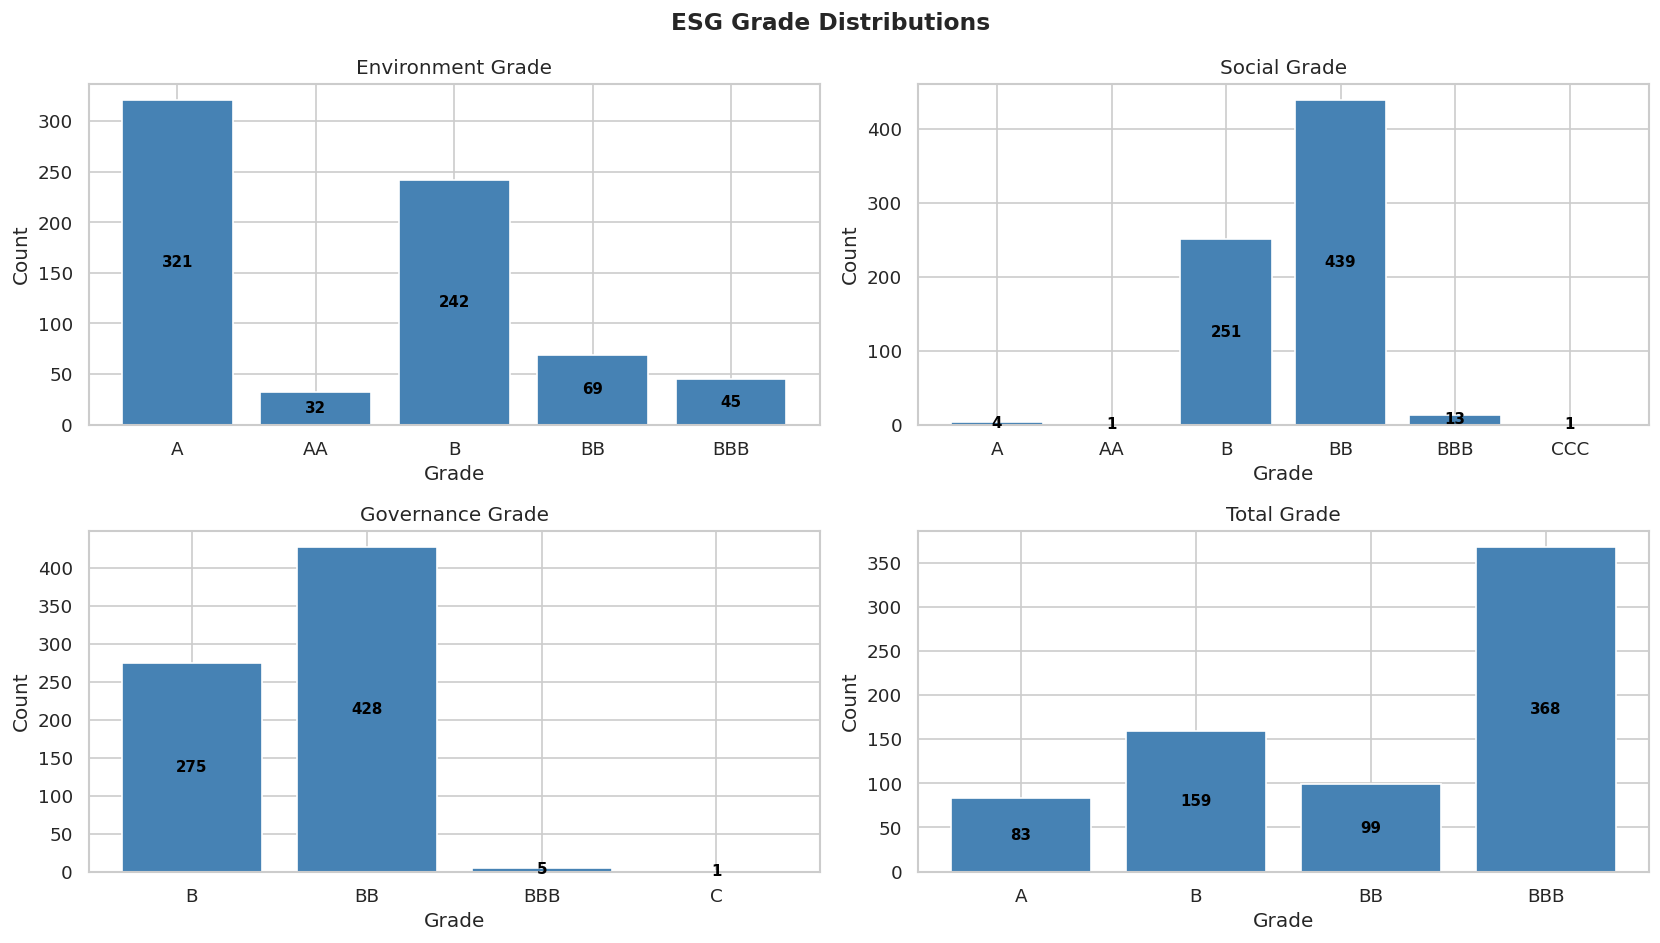

In [79]:
plot_grade_distributions(df)

***~ Grade Distribution ~***

Grades are derived by mapping numeric scores to letter grade bins, meaning they reflect
the same underlying distributions seen above in categorical form.

**Environment Grade** is split primarily between A and B, consistent with the bimodal
score distribution where companies cluster at either end of the performance spectrum.

**Social Grade** is heavily concentrated in BB, reflecting the tight peak around 300
seen in the social score distribution.

**Governance Grade** is dominated by BB with a secondary cluster at B, consistent with
the narrow, normally distributed governance scores.

**Total Grade** is skewed toward BBB, which mirrors the upper mode of the total score
distribution.

*Note that grade scales vary across pillars (e.g., Social includes CCC while Governance
includes C), reflecting differences in the ***score ranges*** of each pillar rather than
inconsistencies in the rating methodology.*

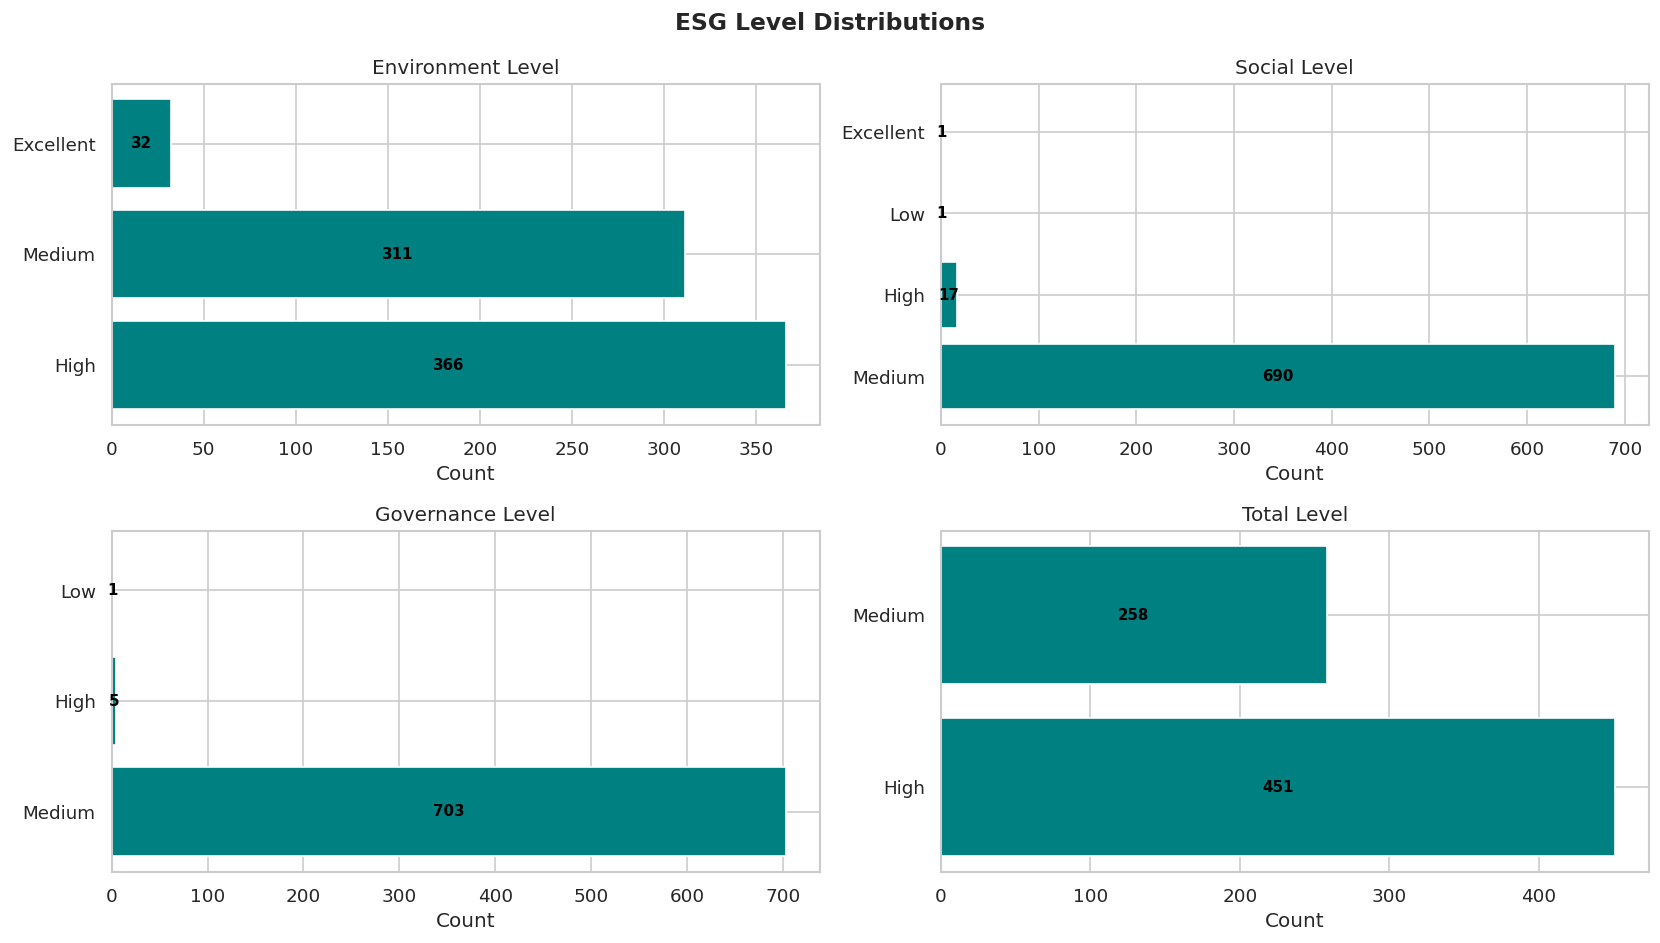

In [80]:
plot_level_distributions(df)

***~ Level Distribution ~***

Levels are a higher-order categorical grouping derived from the same numeric scores, bucketing companies into broad performance tiers (Low, Medium, High, Excellent).

**Environment Level** is the most balanced of the four pillars, split fairly evenly between Medium and High, with a small Excellent category. This reflects the bimodal nature of the environment scores, where companies tend toward either end.

**Social Level** is almost entirely Medium, with negligible High and no Excellent companies, indicating that social performance is tightly concentrated in a narrow score range across the dataset.

**Governance Level** mirrors Social, with Medium dominating and virtually no High or Low companies, reinforcing that governance scores are the most homogeneous pillar.

**Total Level** is split between Medium and High with no extreme categories, reflecting the averaging effect of aggregating across three pillars with different distributions.

*The near-absence of Excellent and Low classifications across most pillars suggests the dataset is concentrated in the ***middle of the performance spectrum***, which may limit the model's ability to distinguish top and bottom performers.*

In [81]:
df['industry'].value_counts()

industry
Technology                            63
Biotechnology                         56
Health Care                           51
Real Estate                           36
Financial Services                    33
Utilities                             30
Banking                               29
Insurance                             27
Electrical Equipment                  27
Retail                                26
Semiconductors                        24
Media                                 23
Hotels Restaurants and Leisure        22
Pharmaceuticals                       21
Machinery                             21
Consumer products                     20
Chemicals                             19
Energy                                19
Life Sciences Tools and Services      16
Food Products                         14
Building                              10
Aerospace and Defense                 10
Communications                         9
Metals and Mining                      9
Textile

In [82]:
df['industry'].unique()

<StringArray>
[                             'Media',                        'Automobiles',
 'Trading Companies and Distributors',                  'Consumer products',
     'Hotels Restaurants and Leisure',      'Diversified Consumer Services',
                           'Airlines',                          'Insurance',
                     'Communications',                           'Building',
                         'Technology',               'Electrical Equipment',
       'Logistics and Transportation',                      'Biotechnology',
                        'Health Care',   'Life Sciences Tools and Services',
                            'Banking',                     'Semiconductors',
                    'Pharmaceuticals',                 'Financial Services',
   'Commercial Services and Supplies',                          'Chemicals',
                        'Real Estate',                          'Utilities',
                          'Machinery',                      'F

In [83]:
INDUSTRY_MAP = {
    'Hotels, Restaurants & Leisure': 'Hotels Restaurants and Leisure',
    'Metals & Mining':               'Metals and Mining',
    'Aerospace & Defense':           'Aerospace and Defense',
    'Energy ':                       'Energy',  # trailing whitespace
}

def standardize_industries(df: pd.DataFrame, mapping: dict) -> pd.DataFrame:
    df['industry'] = df['industry'].replace(mapping)
    return df

df = standardize_industries(df, INDUSTRY_MAP)

*Needed to fix industry labels, some were not mapped correctly which leads to inaccurate counts and groupings. This is crucial for model accuracy since ESG scores are ***industry-relative***.*

**Merged** (formatting inconsistencies only):
- `Hotels, Restaurants & Leisure` → `Hotels Restaurants and Leisure`
- `Metals & Mining` → `Metals and Mining`
- `Aerospace & Defense` → `Aerospace and Defense`
- `Energy ` → `Energy` (trailing whitespace)

**Did Not Merge** (distinct business models per Global Industry Classification Standard(GICS)):
- `Telecommunication` vs `Communications`: infrastructure providers (e.g., carriers) vs broader media and messaging companies
- `Road and Rail` vs `Logistics and Transportation`: freight and passenger transport operators vs broader supply chain and distribution services
- `Automobiles` vs `Auto Components`: vehicle manufacturers (OEMs) vs parts suppliers operating at different points in the supply chain
- `Distributors` vs `Trading Companies and Distributors`: single product category distributors vs broader multi-commodity trading activities

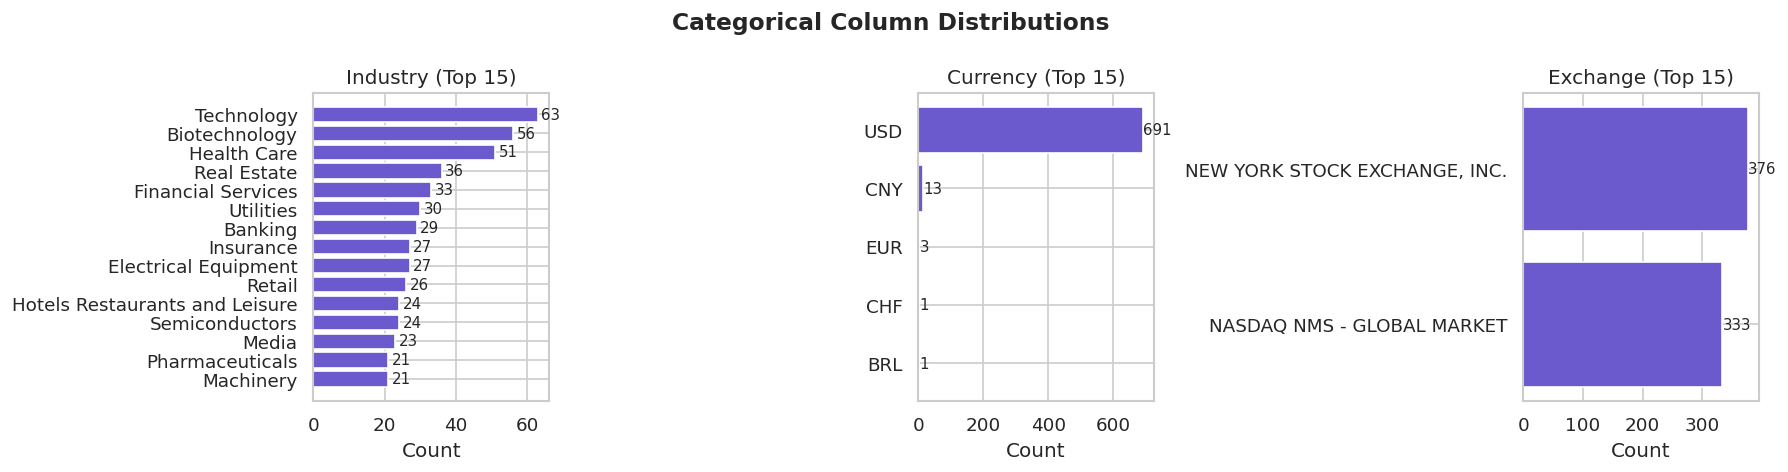

In [84]:
plot_categorical_distributions(df, cols=['industry', 'currency', 'exchange'])

***~ Categorical Distributions ~***

**Industry** is dominated by Technology (63), Biotechnology (56), and Health Care (51), which together account for a disproportionate share of the dataset. The remaining industries taper off gradually, suggesting the dataset skews toward knowledge-based and service-oriented sectors over capital-intensive ones.

**Currency** is overwhelmingly USD (691), with minimal representation from CNY (13), EUR (3), CHF (1), and BRL (1), indicating the dataset is almost entirely composed of US-listed companies.

**Exchange** is split between the New York Stock Exchange (376) and NASDAQ NMS Global Market (333), with no other exchanges represented, further confirming the dataset is exclusively US-market focused.

*The concentration of USD-denominated companies across only two exchanges confirms this is a ***US-centric dataset***, which should be noted as a limitation when generalizing findings beyond domestic markets.*

### ***Helper Functions for Correlation Analysis***

In [85]:
def plot_correlation_heatmap(df: pd.DataFrame, cols: list) -> None:
    """Heatmap of Pearson correlations between numeric columns."""
    corr = df[cols].corr()
    fig, ax = plt.subplots()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                linewidths=0.5, ax=ax, vmin=-1, vmax=1)
    ax.set_title('ESG Score Correlation Matrix')
    plt.tight_layout()
    plt.show()

def plot_pairplot(df: pd.DataFrame, cols: list, hue: str) -> None:
    """Pairplot of numeric columns colored by a categorical hue variable."""
    pair_df = df[cols + [hue]].dropna()
    sns.pairplot(pair_df, hue=hue, diag_kind='kde', plot_kws={'alpha': 0.4}, height=2.5)
    plt.suptitle(f'ESG Score Pairplot by {hue.replace("_", " ").title()}', y=1.02,
                 fontsize=13, fontweight='bold')
    plt.show()

### ***Correlation Analysis***

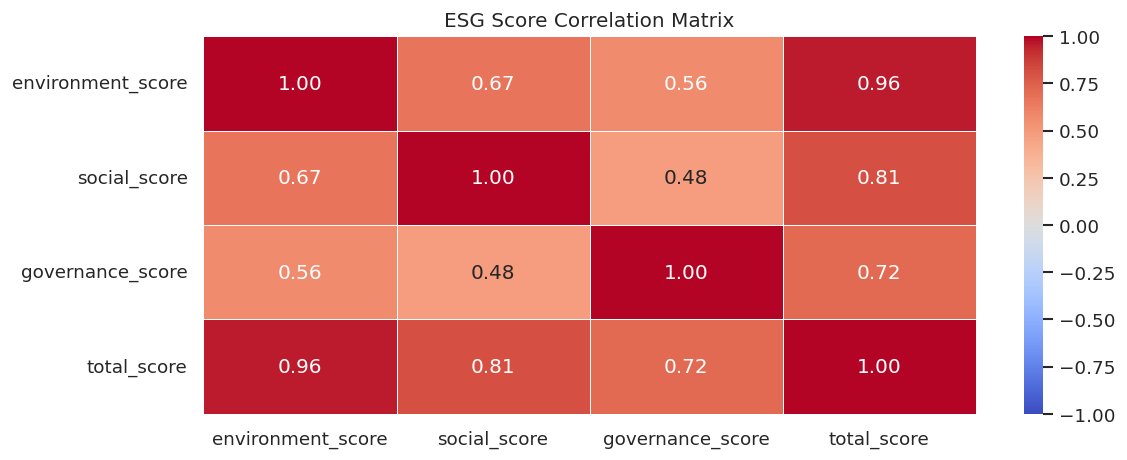

In [86]:
plot_correlation_heatmap(df, SCORE_COLS)

***~ Correlation Matrix Analysis ~***

All three ESG pillars are positively correlated with one another and with the total score, confirming that companies that perform well on one pillar tend to perform well across all.

**Environment Score** has the strongest relationship with total score (0.96), meaning it is the dominant driver of the aggregate rating. This is consistent with the bimodal environment distribution observed earlier, where companies at either extreme pull the total score strongly in one direction.

**Social Score** has a moderate to strong correlation with environment (0.67) and total score (0.81), but a weaker relationship with governance (0.48), suggesting social and governance performance are more independently assessed.

**Governance Score** has the weakest correlations across the board, with environment (0.56), social (0.48), and total score (0.72), indicating it contributes the least to the aggregate and is the most independently varying pillar.

*The outsized influence of the ***environment score*** on the total rating suggests that models predicting total ESG performance will be heavily influenced by environmental factors, which should be accounted for during ***feature engineering***.*

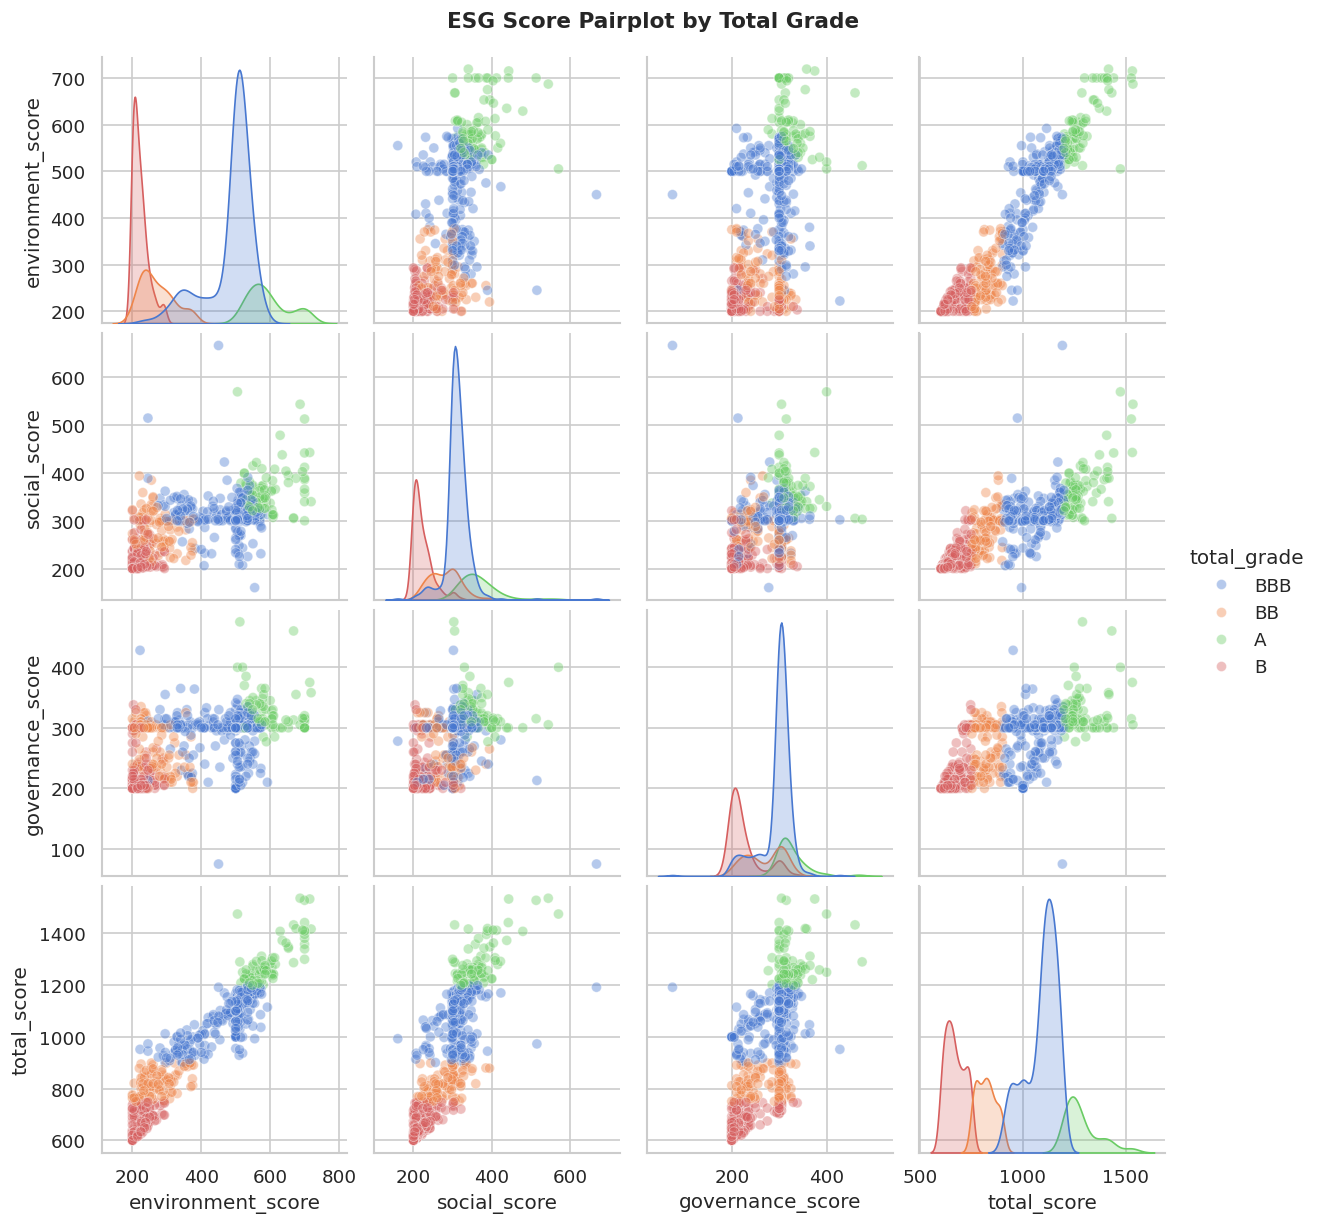

In [87]:
plot_pairplot(df, SCORE_COLS, hue='total_grade')

***~ Pairplot Analysis ~***

The pairplot visualizes relationships between all ESG score pairs, colored by total grade (A, B, BB, BBB), following a bond-rating style hierarchy where **A is the highest** and **B is the lowest**.

**Grade separation by environment score** is the clearest pattern in the plot. Grade A companies (green) cluster at the high end of the environment score range (500 to 800), while B companies (red) concentrate at the low end (200 to 300), confirming the environment score's dominant influence on the total grade.

**Social and governance scores** show much weaker grade separation, with all four grade groups heavily overlapping in the 200 to 350 range. This reinforces that social and governance scores alone are poor predictors of the overall grade.

**Total score** shows clean grade separation on the diagonal Kernel Density Estimate (KDE), with A companies peaking around 1200 to 1500 and B companies peaking around 650 to 800, reflecting the cumulative effect of environment score differences across grades.

*The visual dominance of ***environment score*** in separating grade clusters across every scatter panel further supports its role as the ***primary driver*** of overall ESG performance in this dataset.*

### ***Helper Functions for Industry Breakdown***

In [94]:
def get_top_industries(df: pd.DataFrame, n: int = 15) -> list:
    """Returns the top N industries by company count."""
    return df['industry'].value_counts().head(n).index.tolist()

def plot_industry_counts(df: pd.DataFrame, n: int = 15) -> None:
    """Horizontal bar chart of company count per industry."""
    counts = df['industry'].value_counts().head(n)
    fig, ax = plt.subplots()
    bars = ax.barh(counts.index, counts.values, color='steelblue', edgecolor='white')
    ax.invert_yaxis()
    ax.set_title(f'Company Count by Industry (Top {n})')
    ax.set_xlabel('Count')
    for bar, val in zip(bars, counts.values):
        ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                str(val), ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_industry_mean_scores(df: pd.DataFrame, n: int = 15) -> None:
    """Grouped bar chart of mean ESG scores per industry."""
    top = get_top_industries(df, n)
    scores = (
        df[df['industry'].isin(top)]
        .groupby('industry')[SCORE_COLS]
        .mean()
        .sort_values('total_score', ascending=False)
    )
    fig, ax = plt.subplots(figsize=(13, 5))
    scores.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='white', width=0.8)
    ax.set_title(f'Mean ESG Scores by Industry (Top {n})')
    ax.set_ylabel('Mean Score')
    ax.set_xlabel('Industry')
    ax.legend(title='Score', bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_industry_boxplot(df: pd.DataFrame, n: int = 15) -> None:
    """Boxplot of total ESG score distribution per industry."""
    top = get_top_industries(df, n)
    plot_df = df[df['industry'].isin(top)]
    fig, ax = plt.subplots(figsize=(13, 5))
    sns.boxplot(data=plot_df, x='industry', y='total_score', order=top,
                palette='Set3', ax=ax)
    ax.set_title(f'Total ESG Score Distribution by Industry (Top {n})')
    ax.set_xlabel('Industry')
    ax.set_ylabel('Total Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_industry_pillar_heatmap(df: pd.DataFrame, n: int = 15) -> None:
    """Heatmap of mean E, S, G pillar scores per industry."""
    top = get_top_industries(df, n)
    pillar_cols = ['environment_score', 'social_score', 'governance_score']
    pivot = (
        df[df['industry'].isin(top)]
        .groupby('industry')[pillar_cols]
        .mean()
        .round(1)
        .sort_values('environment_score', ascending=False)
    )
    fig, ax = plt.subplots(figsize=(8, 7))
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlGn', linewidths=0.5, ax=ax)
    ax.set_title('Mean Pillar Scores by Industry')
    ax.set_xlabel('ESG Pillar')
    ax.set_ylabel('Industry')
    plt.tight_layout()
    plt.show()

### ***Industry Breakdown Analysis***

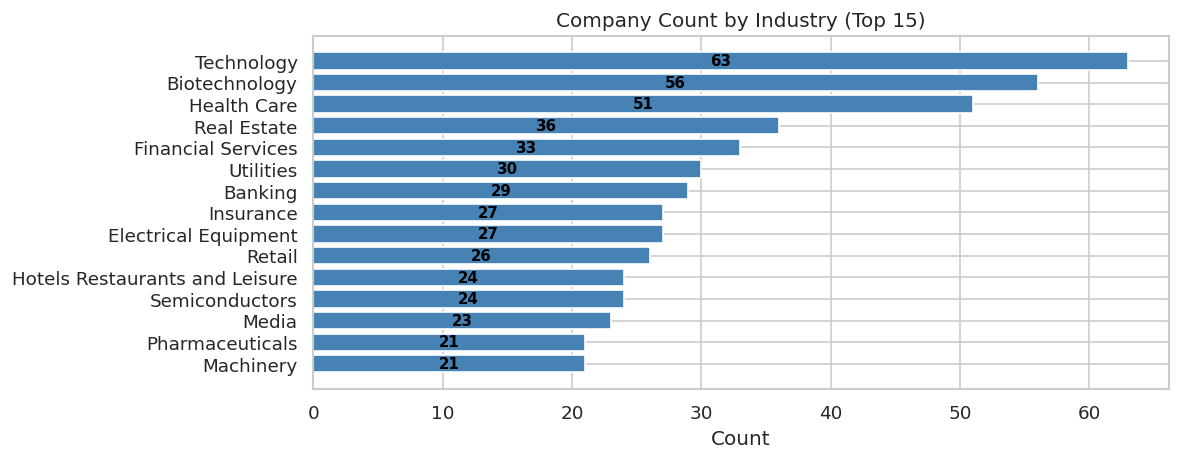

In [95]:
plot_industry_counts(df)

***~ Industry Count ~***

The dataset is unevenly distributed across industries, with **Technology** (63), **Biotechnology** (56), and **Health Care** (51) being the three most represented sectors. Most other industries fall between 20 and 36 companies, with **Pharmaceuticals** and **Machinery** tied at the bottom of the top 15 with 21 companies each.

*The overrepresentation of knowledge-based sectors may introduce ***sampling bias***, as the model will have more examples to learn from in these industries than in ***capital-intensive*** ones. To mitigate this, industries with fewer than 15 companies will be grouped into a broader ***"Other"*** category before modeling, and ***stratified sampling*** will be applied during the train/test split to ensure proportional industry representation across both sets.*

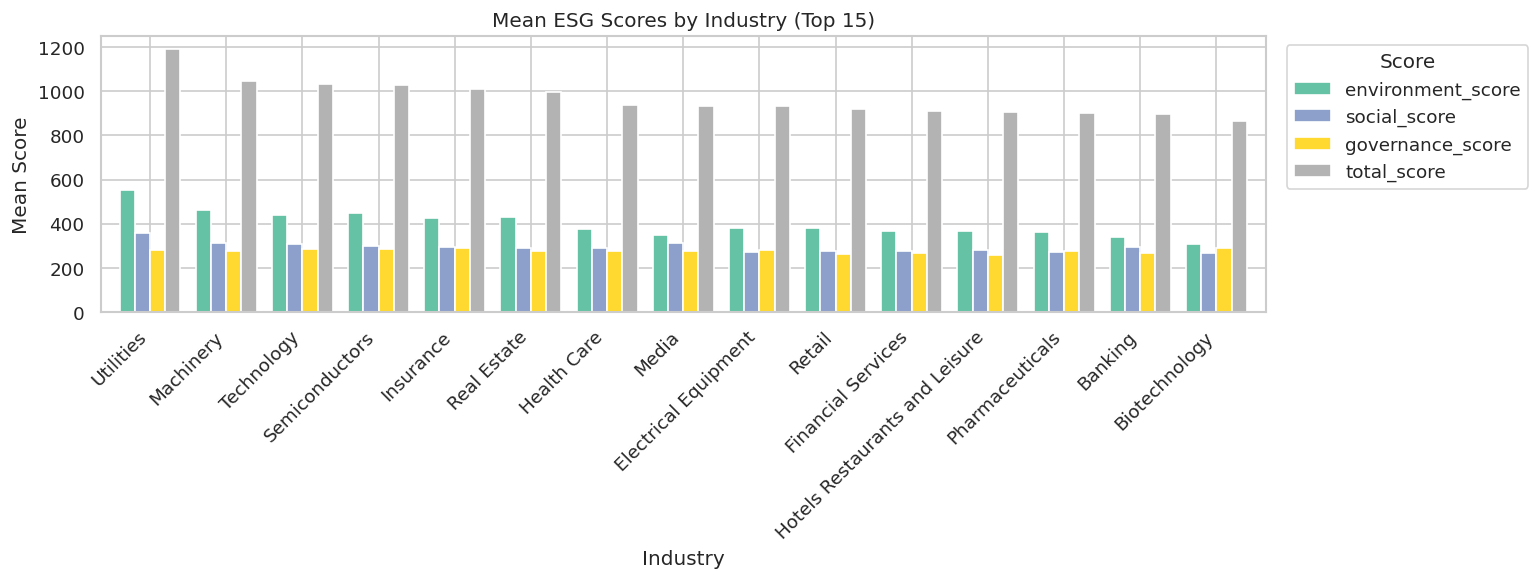

In [96]:
plot_industry_mean_scores(df)

***~ Mean ESG Scores by Industry ~***

**Utilities** leads all industries in both environment score (551.0) and total score (approximately 1200), consistent with the heavy regulatory and sustainability pressure placed on energy infrastructure companies. **Machinery**, **Technology**, and **Semiconductors** follow with notably high environment scores relative to the rest.

Social and governance scores are far more uniform across industries, with most sectors clustered in the 260 to 360 range, reinforcing that environment score is the primary differentiator between industries.

**Biotechnology** ranks last, within the top 15 industries in total score, in environment score (306.5) despite being the second most represented industry, suggesting that life sciences companies prioritize governance and social performance over environmental practices.

*The wide variation in ***environment scores*** across industries, compared to the narrow range of social and governance scores, confirms that ***industry type*** is a strong predictor of environmental performance and should be treated as an important feature in the model.*

/tmp/ipykernel_8561/3287338708.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='industry', y='total_score', order=top,


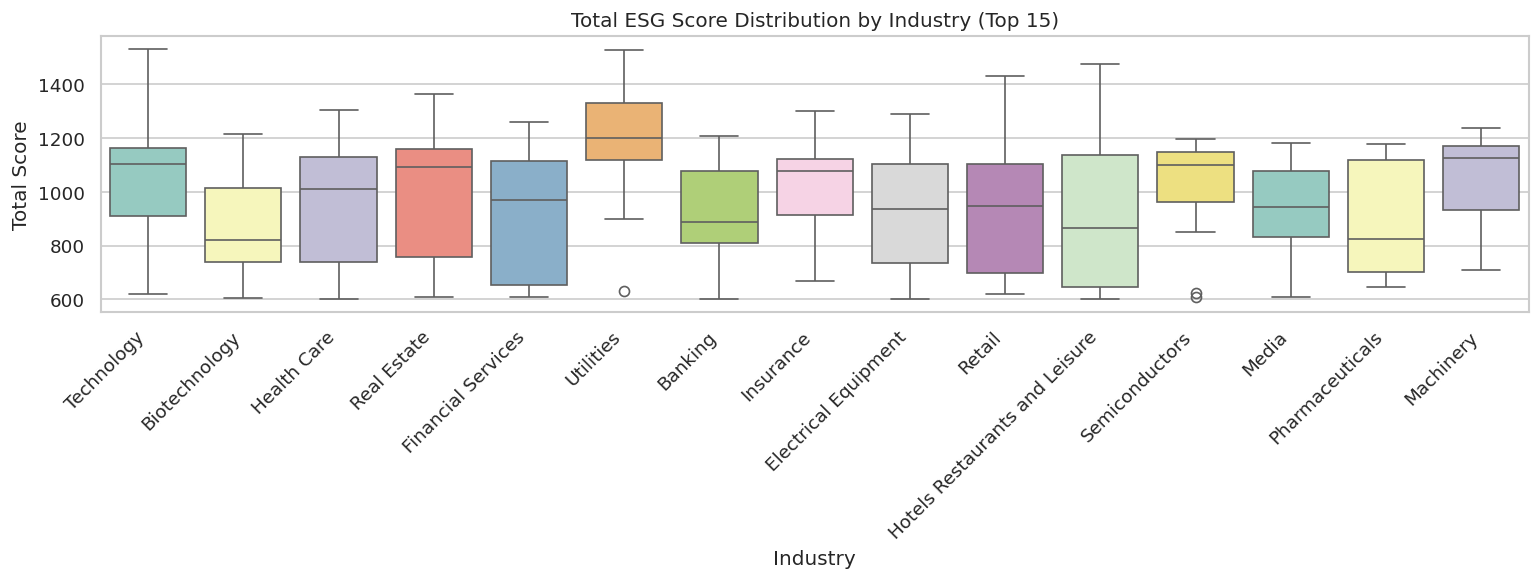

In [97]:
plot_industry_boxplot(df)

***~ Total Score Distribution by Industry ~***

**Utilities** has the highest median total score and the tightest interquartile range in the top 15 most common industries in the dataset, suggesting consistently strong ESG performance with little variation within the sector. **Technology** shows the widest spread, with scores ranging from approximately 650 to 1500, reflecting the diversity of companies within the sector.

**Biotechnology** has the lowest median total score of the top 15 most common industries in the dataset and a compressed distribution at the lower end, consistent with its low environment scores seen in the previous mean bargraph. Most industries show at least a few outliers at the lower end of the score range.

*The wide interquartile ranges in sectors like ***Technology*** and ***Real Estate*** suggest that ***industry alone*** is insufficient to predict ESG performance, and that company-level factors will be necessary for accurate modeling.*

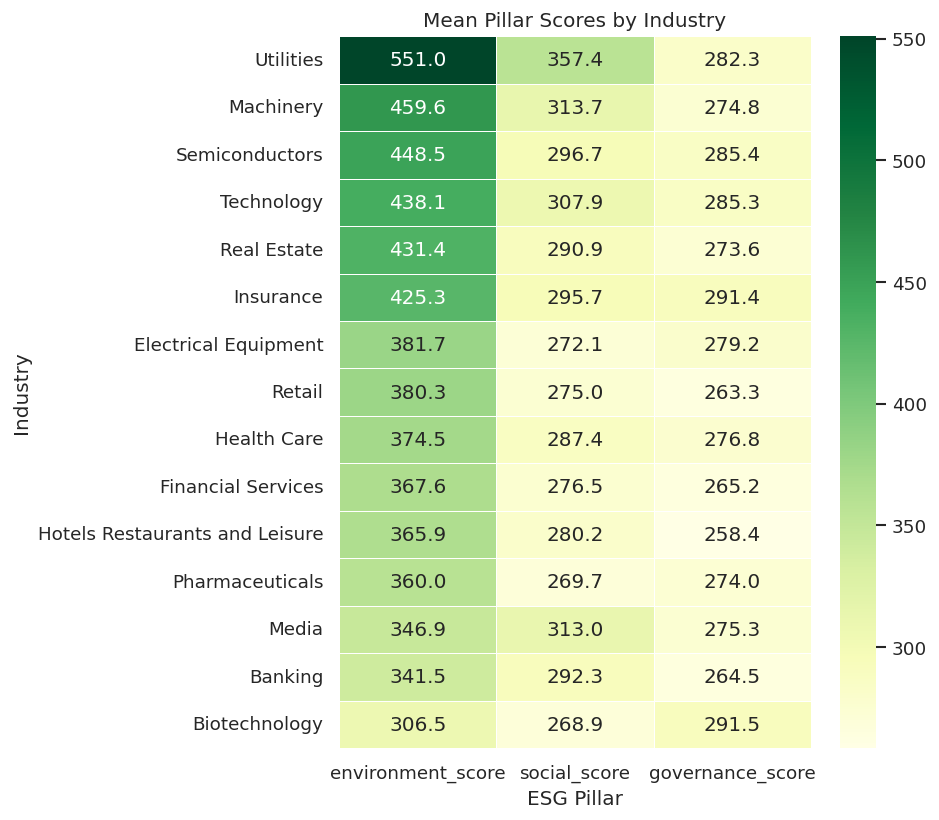

In [98]:
plot_industry_pillar_heatmap(df)

***~ Mean Pillar Scores by Industry (Heatmap) ~***

The heatmap confirms that **environment score** is the most variable pillar across industries, spanning from 306.5 in **Biotechnology** to 551.0 in **Utilities** within the top 15 industries with the highest environmental score. Social and governance scores are comparatively uniform, with most industries scoring between 260 and 360 across both pillars within this top 15.

Capital-intensive industries such as **Utilities**, **Machinery**, and **Semiconductors** consistently rank at the top for environment score within this group, while knowledge-based sectors such as **Biotechnology**, **Banking**, and **Media** rank at the lower end of the top 15.

*The convergence of social and governance scores across industries suggests these pillars are driven more by ***company-level practices*** than by industry norms, while environment score is clearly ***industry-dependent***.*

### ***Helper Functions for Temporal Analysis***

In [105]:
def prepare_temporal(df: pd.DataFrame) -> pd.DataFrame:
    """Extracts year and month period from last_processing_date."""
    df = df.copy()
    df['processing_year'] = df['last_processing_date'].dt.year
    df['processing_month'] = df['last_processing_date'].dt.to_period('M').astype(str)
    return df

def plot_ratings_by_year(df: pd.DataFrame) -> None:
    """Bar chart of company count by processing year."""
    counts = df['processing_year'].value_counts().sort_index()
    fig, ax = plt.subplots()
    bars = ax.bar(counts.index.astype(str), counts.values, color='steelblue', edgecolor='white')
    ax.set_title('Company Ratings by Processing Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    for bar, val in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                str(val), ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_ratings_by_month(df: pd.DataFrame) -> None:
    """Bar chart of company count by processing month."""
    counts = df['processing_month'].value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(14, 4))
    bars = ax.bar(counts.index, counts.values, color='slateblue', edgecolor='white')
    ax.set_title('Company Ratings by Processing Month')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    for bar, val in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                str(val), ha='center', va='center', fontsize=8, color='black', fontweight='bold')
    plt.tight_layout()
    plt.show()

### ***Temporal Analysis***

In [106]:
df_withdate = prepare_temporal(df)

`prepare_temporal` derives two new columns from `last_processing_date`:

**`processing_year`** extracts the calendar year (e.g., 2022) and 
**`processing_month`** extracts the year and month as a string (e.g., "2022-06"). 

These columns are used by the plotting functions below to group and aggregate ratings over time.

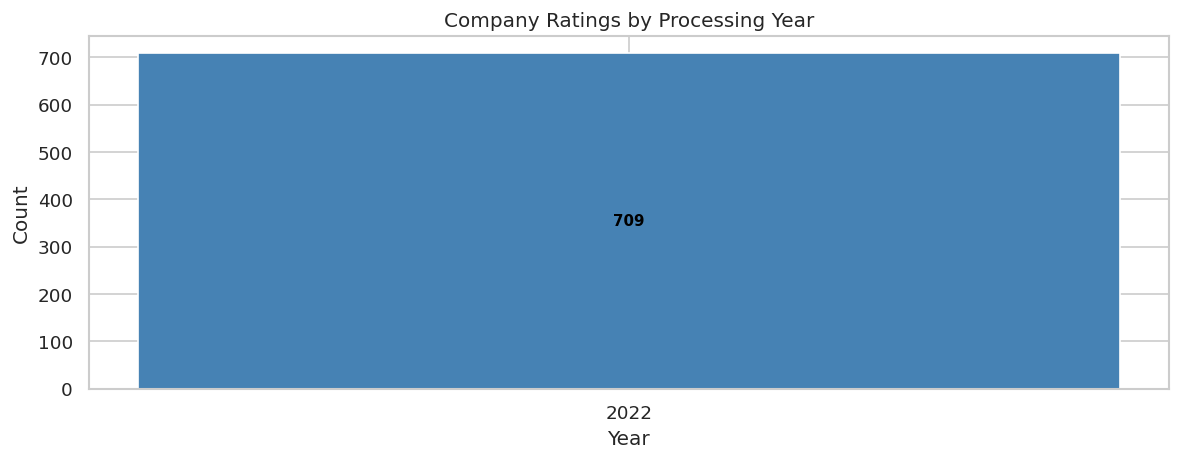

In [107]:
plot_ratings_by_year(df_withdate)

***~ Company Ratings by Year ~***

All 709 company ratings in the dataset were processed in **2022**, meaning there is no temporal variation to analyze across years. The dataset represents a single snapshot in time rather than a longitudinal record of ESG performance.

*This confirms the dataset is a ***cross-sectional snapshot***, which means the model will predict ESG scores at a single point in time rather than tracking changes over time.*

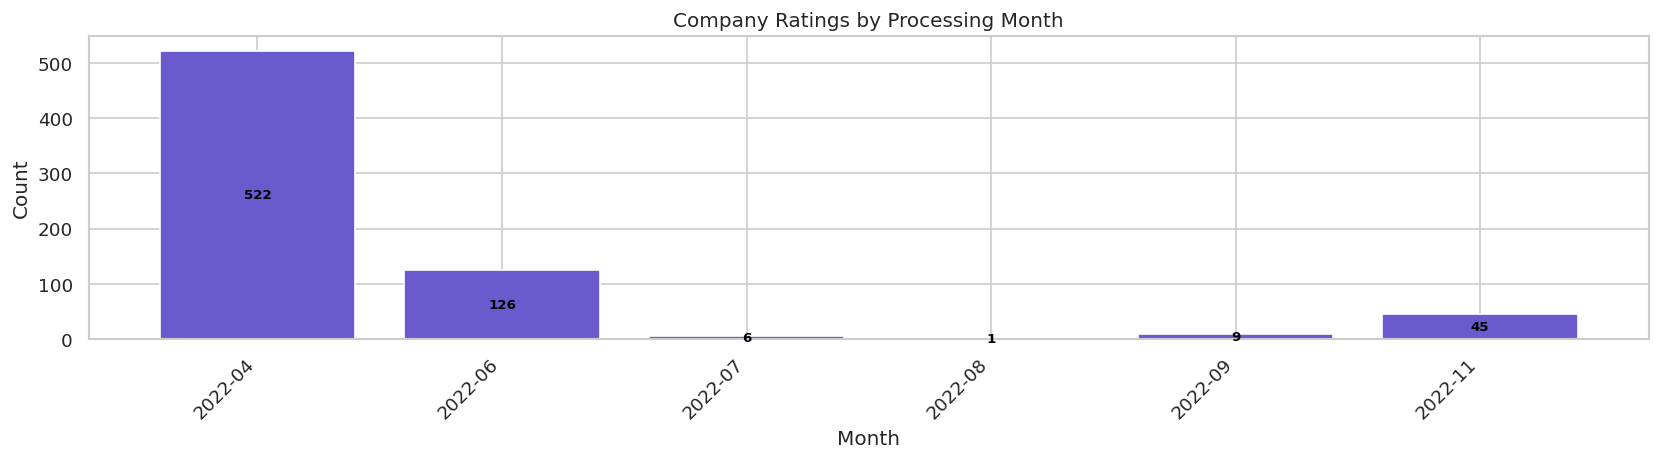

In [108]:
plot_ratings_by_month(df_withdate)

***~ Company Ratings by Month ~***

The monthly breakdown reveals that ratings were processed across six months in 2022, with the vast majority concentrated in **April 2022** (522) and **June 2022** (126). The remaining months — July (6), August (1), September (9), and November (45) — account for a small fraction of the dataset.

*The concentration of ratings in ***April and June 2022*** suggests a batch processing pattern rather than continuous updates, which is consistent with annual ESG rating cycles tied to ***fiscal year-end reporting***.*

### ***Helper Functions for Outlier Detection***

In [114]:
def get_outliers_iqr(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    """
    Identifies outliers using the IQR method.
    Returns a DataFrame flagging each row as an outlier for any of the given columns.
    """
    outlier_mask = pd.DataFrame(False, index=df.index, columns=cols)
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        outlier_mask[col] = (df[col] < lower) | (df[col] > upper)
    return outlier_mask

def summarize_outliers(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    """Returns a summary of outlier counts and percentages per column."""
    mask = get_outliers_iqr(df, cols)
    counts = mask.sum()
    pct = (counts / len(df) * 100).round(2)
    return pd.DataFrame({'Outlier Count': counts, 'Outlier %': pct})

def plot_outlier_boxplots(df: pd.DataFrame, cols: list) -> None:
    """Boxplots for each score column to visualize outlier distribution."""
    fig, axes = plt.subplots(1, len(cols), figsize=(14, 5))
    for ax, col, color in zip(axes, cols, COLORS):
        ax.boxplot(df[col].dropna(), patch_artist=True,
                   boxprops=dict(facecolor=color, alpha=0.6),
                   medianprops=dict(color='black', linewidth=2))
        ax.set_title(col.replace('_', ' ').title())
        ax.set_ylabel('Score')
        ax.set_xticks([])
    plt.suptitle('ESG Score Outlier Boxplots', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def get_outlier_companies(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    """Returns rows where any score column is flagged as an outlier."""
    mask = get_outliers_iqr(df, cols)
    is_outlier = mask.any(axis=1)
    return df[is_outlier][['ticker', 'name', 'industry'] + cols]

### ***Outlier Detection***

In [111]:
summarize_outliers(df, SCORE_COLS)

,Outlier Count,Outlier %
environment_score,0,0.00
social_score,8,1.13
governance_score,4,0.56
total_score,0,0.00


***~ Summary of Outliers by ESG Score ~***

Outliers were identified using the **IQR method**, which flags values falling more than 1.5 times the interquartile range below Q1 or above Q3. The dataset is largely free of outliers, with only **social score** (8 companies, 1.13%) and **governance score** (4 companies, 0.56%) containing flagged values. **Environment** and **total score** have no outliers.

*The low outlier rate suggests the ESG rating methodology produces ***consistent scores*** across companies, and no aggressive outlier removal will be necessary before modeling.*

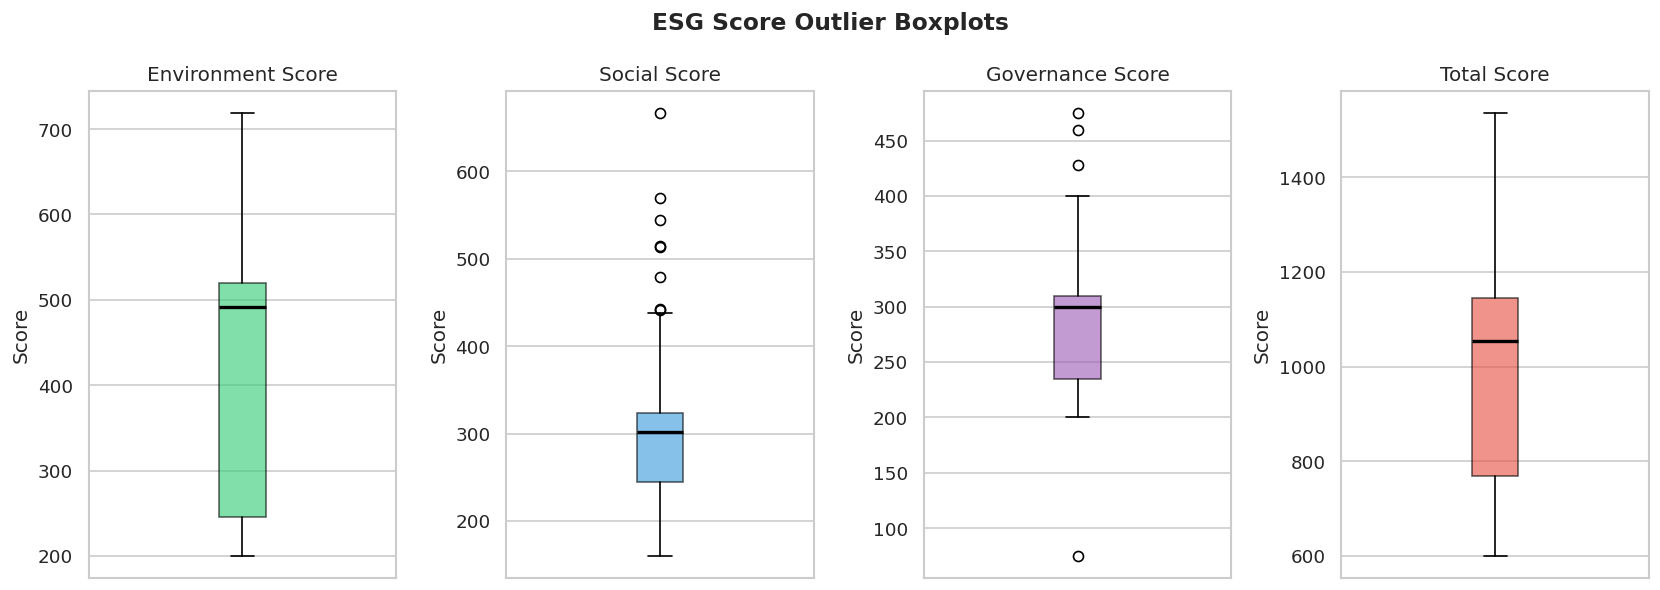

In [115]:
plot_outlier_boxplots(df, SCORE_COLS)

***~ Boxplots of ESG Score ~***

The boxplots visually confirm the outlier summary. **Environment Score** and **Total Score** have no outliers, with whiskers extending cleanly to the minimum and maximum values. **Social Score** shows 8 high-end outliers clustered above 500, and **Governance Score** shows 4 outliers, with one low-end outlier near 75 and three high-end outliers above 425.

In [113]:
get_outlier_companies(df, SCORE_COLS)

,ticker,name,industry,environment_score,social_score,governance_score,total_score
18,abnb,Airbnb Inc,Hotels Restaurants and Leisure,505,570,400,1475
112,akts,Akoustis Technologies Inc,Electrical Equipment,222,302,428,952
137,amzn,Amazon.com Inc,Retail,668,305,460,1433
176,msft,Microsoft Corp,Technology,715,443,375,1533
250,apd,Air Products and Chemicals Inc,Chemicals,700,442,300,1442
253,aph,Amphenol Corp,Electrical Equipment,512,303,475,1290
302,eix,Edison International,Utilities,700,513,315,1528
363,pnw,Pinnacle West Capital Corp,Utilities,629,479,300,1408
452,cop,Conocophillips,Energy,687,544,305,1536
457,cms,CMS Energy Corp,Utilities,450,667,75,1192


***~ Outlier Companies ~***

The 12 flagged outlier companies are predominantly **high performers** driven by exceptional environment scores, including **Microsoft** (715), **Air Products and Chemicals** (700), and **ConocoPhillips** (687). Notably, high environment score outliers span diverse industries including **Technology**, **Utilities**, **Energy**, and **Retail**, suggesting that top environmental performers are not confined to a single sector.

The lone low-end outlier is **CMS Energy Corp**, which has an unusually low governance score of 75 compared to the dataset mean of approximately 278, despite having a high social score of 667 — the highest in the outlier group.

*Given the small number of outliers (12 out of 709 companies), ***no outlier removal*** is recommended. These companies represent genuine performance extremes rather than data errors and should be retained for model training.*

### ***Helper Functions for CIK Coverage***

In [123]:
def summarize_cik_coverage(df: pd.DataFrame) -> pd.DataFrame:
    """Returns a summary of CIK coverage across the dataset."""
    total = len(df)
    has_cik = df['cik'].notna().sum()
    missing_cik = df['cik'].isna().sum()
    return pd.DataFrame({
        'Count': [has_cik, missing_cik, total],
        'Percentage': [round(has_cik / total * 100, 2),
                       round(missing_cik / total * 100, 2), 100.0]
    }, index=['Has CIK', 'Missing CIK', 'Total'])


### ***CIK Coverage***

In [124]:
summarize_cik_coverage(df)

,Count,Percentage
Has CIK,709,100.0
Missing CIK,0,0.0
Total,709,100.0


***~ CIK Coverage ~***

All 709 companies in the dataset have a valid **CIK (Central Index Key)**, confirming 100% linkage between the ESG ratings and SEC EDGAR filings.